## Customer case study - modeling

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

In [162]:
customer_case_df =  pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round2.csv')

In [163]:
# I will drop columns that I don't need or which are irrelevant - Unnamed: 0, Customer and Effective to date

customer_case_df.drop(columns = ["Unnamed: 0"], inplace = True)
customer_case_df.drop(columns = ["Customer"], inplace = True)
customer_case_df.drop(columns = ["Effective To Date"], inplace = True)
customer_case_df

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,Arizona,4809.216960,No,Basic,College,Employed,M,48029,Suburban,Married,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,California,2228.525238,No,Basic,College,Unemployed,F,0,Suburban,Single,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,Washington,14947.917300,No,Basic,Bachelor,Employed,M,22139,Suburban,Single,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,Oregon,22332.439460,Yes,Extended,College,Employed,M,49078,Suburban,Single,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,Oregon,9025.067525,No,Premium,Bachelor,Medical Leave,F,23675,Suburban,Married,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,15563.369440,No,Premium,Bachelor,Unemployed,F,0,Suburban,Married,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,Oregon,5259.444853,No,Basic,College,Employed,F,61146,Urban,Married,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,Arizona,23893.304100,No,Extended,Bachelor,Employed,F,39837,Rural,Married,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,California,11971.977650,No,Premium,College,Employed,F,64195,Urban,Divorced,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [164]:
customer_case_df

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,Arizona,4809.216960,No,Basic,College,Employed,M,48029,Suburban,Married,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,California,2228.525238,No,Basic,College,Unemployed,F,0,Suburban,Single,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,Washington,14947.917300,No,Basic,Bachelor,Employed,M,22139,Suburban,Single,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,Oregon,22332.439460,Yes,Extended,College,Employed,M,49078,Suburban,Single,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,Oregon,9025.067525,No,Premium,Bachelor,Medical Leave,F,23675,Suburban,Married,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,15563.369440,No,Premium,Bachelor,Unemployed,F,0,Suburban,Married,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,Oregon,5259.444853,No,Basic,College,Employed,F,61146,Urban,Married,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,Arizona,23893.304100,No,Extended,Bachelor,Employed,F,39837,Rural,Married,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,California,11971.977650,No,Premium,College,Employed,F,64195,Urban,Divorced,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


### Removing all missing values

In [165]:
# I will check which columns have missing values.

customer_case_df.isna().sum()

State                             631
Customer Lifetime Value             0
Response                          631
Coverage                            0
Education                           0
EmploymentStatus                    0
Gender                              0
Income                              0
Location Code                       0
Marital Status                      0
Monthly Premium Auto                0
Months Since Last Claim           633
Months Since Policy Inception       0
Number of Open Complaints         633
Number of Policies                  0
Policy Type                         0
Policy                              0
Renew Offer Type                    0
Sales Channel                       0
Total Claim Amount                  0
Vehicle Class                     622
Vehicle Size                      622
Vehicle Type                     5482
dtype: int64

In [166]:
# I will drop column Vehicle Type, it has a lot of missing values.

customer_case_df.drop(columns = ["Vehicle Type"], inplace = True)

In [167]:
# I will change missing values for State

customer_case_df["State"] = customer_case_df["State"].fillna("Unknown")

In [168]:
# I will change missing values for Response

customer_case_df["Response"] = customer_case_df["Response"].fillna("Unknown")

In [169]:
# I will change missing values for Vehicle Class

customer_case_df["Vehicle Class"] = customer_case_df["Vehicle Class"].fillna("Unknown")

In [170]:
# I will change missing values for Vehicle Size

customer_case_df["Vehicle Size"] = customer_case_df["Vehicle Size"].fillna("Unknown")

In [171]:
# I will replace missing values for Months Since Last Claim with median.

months_last_claim_mean = customer_case_df["Months Since Last Claim"].median()
months_last_claim_mean

14.0

In [172]:
customer_case_df["Months Since Last Claim"] = customer_case_df["Months Since Last Claim"].fillna(months_last_claim_mean)

In [173]:
# I will replace missing values for Number Of Open Complaints with median of the column

nr_of_open_complaints_median = customer_case_df["Number of Open Complaints"].median()
nr_of_open_complaints_median

0.0

In [174]:
customer_case_df["Number of Open Complaints"] = customer_case_df["Number of Open Complaints"].fillna(nr_of_open_complaints_median)

In [175]:
# Checking again the missing values in my dataframe

customer_case_df.isna().sum()

State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [176]:
# I will replace all 0 values in income column with a mean (calculated without 0 values), because there are too many 
# 0 values.

In [177]:
income_mean = round(customer_case_df[customer_case_df["Income"] != 0]["Income"].mean(), 3)

In [178]:
customer_case_df["Income"].replace({0: income_mean}, inplace = True)

customer_case_df

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Arizona,4809.216960,No,Basic,College,Employed,M,48029.000,Suburban,Married,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,California,2228.525238,No,Basic,College,Unemployed,F,50414.978,Suburban,Single,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,Washington,14947.917300,No,Basic,Bachelor,Employed,M,22139.000,Suburban,Single,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,Oregon,22332.439460,Yes,Extended,College,Employed,M,49078.000,Suburban,Single,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,Oregon,9025.067525,No,Premium,Bachelor,Medical Leave,F,23675.000,Suburban,Married,...,31,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,15563.369440,No,Premium,Bachelor,Unemployed,F,50414.978,Suburban,Married,...,40,0.0,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize
10906,Oregon,5259.444853,No,Basic,College,Employed,F,61146.000,Urban,Married,...,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
10907,Arizona,23893.304100,No,Extended,Bachelor,Employed,F,39837.000,Rural,Married,...,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize
10908,California,11971.977650,No,Premium,College,Employed,F,64195.000,Urban,Divorced,...,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize


### X, Y split. I will remove the target variable - Total Claim Amount - from the original dataframe and put it separately.

In [179]:
X = customer_case_df.drop("Total Claim Amount", axis = 1)
y = customer_case_df["Total Claim Amount"]

In [180]:
# I will leave only numerical columns in X.

X = X._get_numeric_data()
X

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,4809.216960,48029.000,61,7.0,52,0.0,9
1,2228.525238,50414.978,64,3.0,26,0.0,1
2,14947.917300,22139.000,100,34.0,31,0.0,2
3,22332.439460,49078.000,97,10.0,3,0.0,2
4,9025.067525,23675.000,117,14.0,31,0.0,7
...,...,...,...,...,...,...,...
10905,15563.369440,50414.978,253,14.0,40,0.0,7
10906,5259.444853,61146.000,65,7.0,68,0.0,6
10907,23893.304100,39837.000,201,11.0,63,0.0,2
10908,11971.977650,64195.000,158,0.0,27,4.0,6


array([[<AxesSubplot:title={'center':'Customer Lifetime Value'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Monthly Premium Auto'}>],
       [<AxesSubplot:title={'center':'Months Since Last Claim'}>,
        <AxesSubplot:title={'center':'Months Since Policy Inception'}>,
        <AxesSubplot:title={'center':'Number of Open Complaints'}>],
       [<AxesSubplot:title={'center':'Number of Policies'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

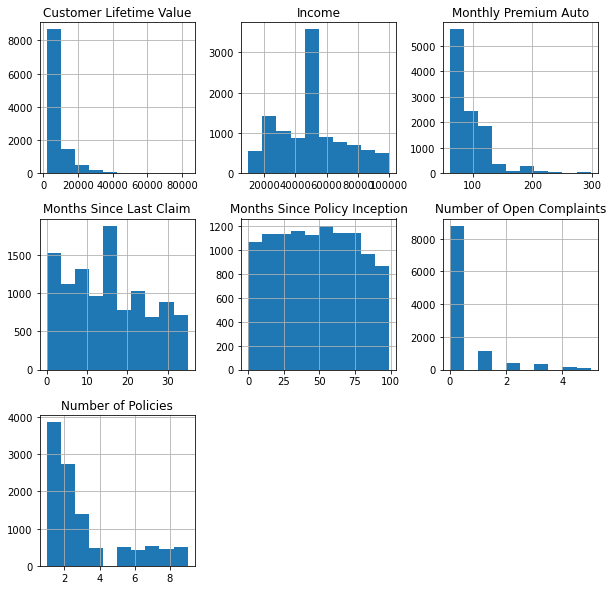

In [181]:
# I will check the distribution of all numerical columns.

X.hist(figsize = (10,10))

{'whiskers': [<matplotlib.lines.Line2D at 0x171beccd0>,
 'caps': [<matplotlib.lines.Line2D at 0x171bed270>,
 'boxes': [<matplotlib.lines.Line2D at 0x171beca00>],
 'medians': [<matplotlib.lines.Line2D at 0x171bed810>],
 'fliers': [<matplotlib.lines.Line2D at 0x171bedae0>],
 'means': []}

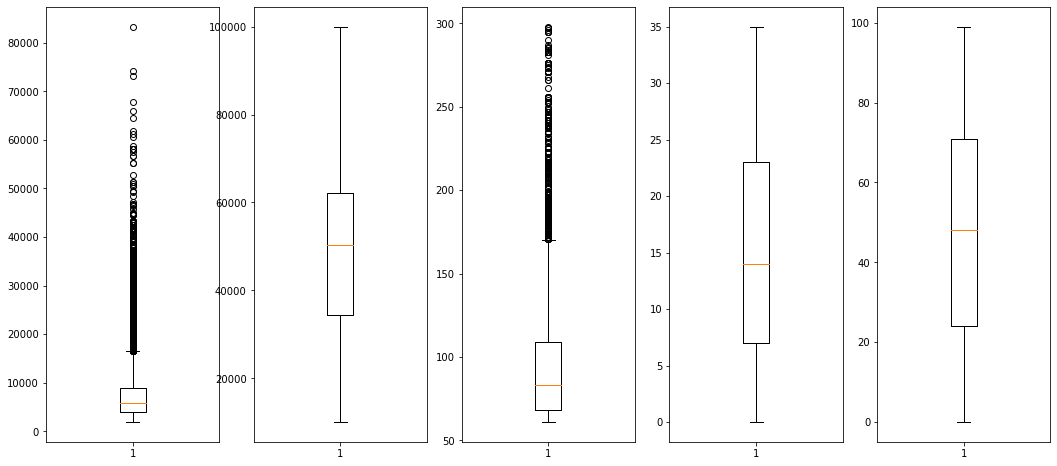

In [182]:
# I will check the outliers.

fig, ax = plt.subplots(1,5,figsize=(18,8))
ax[0].boxplot(X["Customer Lifetime Value"])
ax[1].boxplot(X["Income"])
ax[2].boxplot(X["Monthly Premium Auto"])
ax[3].boxplot(X["Months Since Last Claim"])
ax[4].boxplot(X["Months Since Policy Inception"])

In [183]:
# Maybe I should remove outliers from Customer Lifetime Value, Monthly premium auto.

In [184]:
X.groupby('Customer Lifetime Value').count()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
Customer Lifetime Value,,,,,,
1898.007675,1,1,1,1,1,1
1898.683686,1,1,1,1,1,1
1904.000852,1,1,1,1,1,1
1918.119700,2,2,2,2,2,2
1940.981221,1,1,1,1,1,1
...,...,...,...,...,...,...
66025.754070,1,1,1,1,1,1
67907.270500,1,1,1,1,1,1
73225.956520,1,1,1,1,1,1


### One Hot for categorical variables.

In [185]:
# I will put all categorical columns in a new dataframe.

categorical_features = customer_case_df.select_dtypes("object")
categorical_features

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize
4,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,No,Premium,Bachelor,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize
10906,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize
10907,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize
10908,California,No,Premium,College,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize


In [186]:
# I will transform all categorical columns using one hot encoding, using dummies. 
# I am deleting first new column for every feature because of a correlation issue.

categorical_dummies = pd.get_dummies(categorical_features, drop_first=True)
categorical_dummies

,State_California,State_Nevada,State_Oregon,State_Unknown,State_Washington,Response_Unknown,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,...,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Class_Unknown,Vehicle Size_Medsize,Vehicle Size_Small,Vehicle Size_Unknown
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,1,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0,1,0,0,0,0,0,0,1,0,...,1,1,0,0,0,0,0,1,0,0
10906,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
10907,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0
10908,1,0,0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,1,0,0


In [187]:
# Concatenating the numerical table with categorical dummies.

X = pd.concat([X,categorical_dummies],axis=1)
X

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,State_California,State_Nevada,State_Oregon,...,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Class_Unknown,Vehicle Size_Medsize,Vehicle Size_Small,Vehicle Size_Unknown
0,4809.216960,48029.000,61,7.0,52,0.0,9,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2228.525238,50414.978,64,3.0,26,0.0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,14947.917300,22139.000,100,34.0,31,0.0,2,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,22332.439460,49078.000,97,10.0,3,0.0,2,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,9025.067525,23675.000,117,14.0,31,0.0,7,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,15563.369440,50414.978,253,14.0,40,0.0,7,0,1,0,...,1,1,0,0,0,0,0,1,0,0
10906,5259.444853,61146.000,65,7.0,68,0.0,6,0,0,1,...,0,0,0,0,0,0,0,1,0,0
10907,23893.304100,39837.000,201,11.0,63,0.0,2,0,0,0,...,1,0,1,0,0,0,0,1,0,0
10908,11971.977650,64195.000,158,0.0,27,4.0,6,1,0,0,...,0,0,0,1,0,0,0,1,0,0


In [188]:
# I will drop some columns, because they don't have any importance in my model.

X.drop(columns = ["State_Oregon", "Sales Channel_Branch", "Months Since Policy Inception", "Policy_Corporate L2", "Sales Channel_Web"], inplace = True)

X

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Number of Open Complaints,Number of Policies,State_California,State_Nevada,State_Unknown,State_Washington,...,Sales Channel_Call Center,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Class_Unknown,Vehicle Size_Medsize,Vehicle Size_Small,Vehicle Size_Unknown
0,4809.216960,48029.000,61,7.0,0.0,9,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2228.525238,50414.978,64,3.0,0.0,1,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,14947.917300,22139.000,100,34.0,0.0,2,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0
3,22332.439460,49078.000,97,10.0,0.0,2,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,9025.067525,23675.000,117,14.0,0.0,7,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,15563.369440,50414.978,253,14.0,0.0,7,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
10906,5259.444853,61146.000,65,7.0,0.0,6,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10907,23893.304100,39837.000,201,11.0,0.0,2,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
10908,11971.977650,64195.000,158,0.0,4.0,6,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0


### Day 2. Train-test split.

In [189]:
# I will check my X and y tables to see that they look like I want.

X

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Number of Open Complaints,Number of Policies,State_California,State_Nevada,State_Unknown,State_Washington,...,Sales Channel_Call Center,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Class_Unknown,Vehicle Size_Medsize,Vehicle Size_Small,Vehicle Size_Unknown
0,4809.216960,48029.000,61,7.0,0.0,9,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2228.525238,50414.978,64,3.0,0.0,1,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,14947.917300,22139.000,100,34.0,0.0,2,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0
3,22332.439460,49078.000,97,10.0,0.0,2,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,9025.067525,23675.000,117,14.0,0.0,7,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,15563.369440,50414.978,253,14.0,0.0,7,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
10906,5259.444853,61146.000,65,7.0,0.0,6,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10907,23893.304100,39837.000,201,11.0,0.0,2,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
10908,11971.977650,64195.000,158,0.0,4.0,6,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [190]:
y

0         292.800000
1         744.924331
2         480.000000
3         484.013411
4         707.925645
            ...     
10905    1214.400000
10906     273.018929
10907     381.306996
10908     618.288849
10909    1021.719397
Name: Total Claim Amount, Length: 10910, dtype: float64

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30,random_state = 123)

### I will standardize X_train and X_test

In [192]:
# I will use standardscaler. I will fit it using train set and then apply this fit to both, train set and test set.

std_scaler = StandardScaler().fit(X_train)

X_train_scaled = std_scaler.transform(X_train)

print(X_train_scaled)

[[-6.70129508e-01 -8.50078307e-01 -1.77408046e-01 ...  7.18037943e-01
  -4.77711657e-01 -2.41845526e-01]
 [ 3.04436074e+00 -7.18525577e-01  4.22263292e+00 ... -1.39268406e+00
   2.09331295e+00 -2.41845526e-01]
 [-7.21338256e-02  2.21652770e+00  5.41730577e-02 ...  7.18037943e-01
  -4.77711657e-01 -2.41845526e-01]
 ...
 [ 9.78796193e-01  3.51845728e-03  1.32786913e+00 ...  7.18037943e-01
  -4.77711657e-01 -2.41845526e-01]
 [ 5.21054160e+00 -1.30872860e+00  1.12523566e+00 ...  7.18037943e-01
  -4.77711657e-01 -2.41845526e-01]
 [-8.01183967e-01  1.27255971e+00 -8.43203718e-01 ...  7.18037943e-01
  -4.77711657e-01 -2.41845526e-01]]


In [193]:
X_test_scaled = std_scaler.transform(X_test)

print(X_test_scaled)

[[-0.82006016  0.00351846 -0.61162261 ...  0.71803794 -0.47771166
  -0.24184553]
 [-0.28953319 -1.44409096 -0.49583206 ...  0.71803794 -0.47771166
  -0.24184553]
 [-0.38514774  1.00516239 -0.7563608  ...  0.71803794 -0.47771166
  -0.24184553]
 ...
 [-0.74223931  1.45865281 -0.55372734 ...  0.71803794 -0.47771166
  -0.24184553]
 [ 0.63136522 -0.67579987  1.79103133 ...  0.71803794 -0.47771166
  -0.24184553]
 [ 0.14524812  0.00351846  0.98049747 ... -1.39268406 -0.47771166
  -0.24184553]]


### Apply linear regression.

In [194]:
# Making a model.

model = LinearRegression()   
model.fit(X_train_scaled, y_train)

LinearRegression()

In [195]:
# Finding model parameters - b1, b2, b3 etc.

model.coef_

array([-5.91476381e-01, -5.04140141e+00,  1.89332106e+02,  5.26652393e+00,
       -2.15395338e+00,  3.09257351e+00,  1.64644480e+00,  1.35079772e+00,
        6.79505955e+14,  3.14425811e+00, -6.79505955e+14, -8.09462098e+00,
       -8.43848961e+00, -6.94287432e+00, -4.82915350e+00, -2.54322545e+00,
        4.29178191e+00, -3.58191562e+00, -1.18424112e+00,  3.35144098e+00,
        6.08366238e-01,  3.81804045e+01,  6.36033319e+00,  1.84018560e+02,
        8.52753666e+01, -2.10392802e+00,  2.86584324e+01, -3.06330933e+14,
       -1.34753134e+14,  1.86283093e+00,  2.36922610e+14,  2.95660281e+14,
        3.41739224e+14,  5.34317948e+13,  9.16611451e+13,  8.57466688e+13,
        7.19766187e+00,  3.65872204e+00,  3.08278354e+00, -1.33766094e+00,
       -5.19707504e+00, -6.50136246e+00, -1.05150825e+01, -8.23768051e+00,
       -1.12496837e+00,  3.13673503e+14, -2.42373035e+00,  1.19519152e+00,
       -3.13673503e+14])

In [196]:
# Finding the intercept b0.

model.intercept_

434.0904876649221

In [197]:
# Finding predicted y values.

y_predicted = model.predict(X_test_scaled) 

y_predicted

array([556.46548766, 379.21548766, -10.78451234, ...,  30.93423766,
       408.74673766, 828.79361266])

In [198]:
# Checking y test values.

y_test

1183     518.400000
2111     364.800000
7971      29.984815
7189     166.937747
3103     556.800000
           ...     
5104     350.400000
1632     934.656068
9488      97.928632
1303     388.148089
2226    1176.285998
Name: Total Claim Amount, Length: 3273, dtype: float64

In [199]:
# I am just checking if y test and y predict have same length.

len(y_predicted)

3273

In [200]:
len(y_test)

3273

In [201]:
# Now we can compare some y and y_predicted values.

In [202]:
# I will put y values and y_predicted values into a new table.

result = pd.DataFrame({"y_test":y_test,"y_predicted":y_predicted})

In [203]:
result

,y_test,y_predicted
1183,518.400000,556.465488
2111,364.800000,379.215488
7971,29.984815,-10.784512
7189,166.937747,165.590488
3103,556.800000,605.434238
...,...,...
5104,350.400000,416.465488
1632,934.656068,661.934238
9488,97.928632,30.934238
1303,388.148089,408.746738


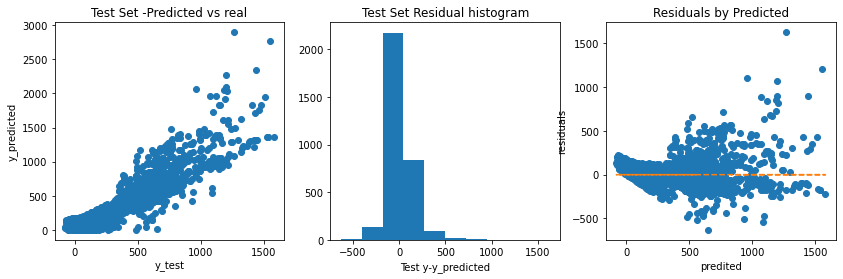

In [204]:
# I will make plots to 

#                      1. see the relationship between y and y_predicted

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_predicted, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_predicted")
ax[0].set_title("Test Set -Predicted vs real")

#                      2. histogram to see the distribution of errors

ax[1].hist(y_test - y_predicted)
ax[1].set_xlabel("Test y-y_predicted")
ax[1].set_title("Test Set Residual histogram")

#                      3. if errors variance is fairly constant

ax[2].plot(y_predicted,y_test - y_predicted,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_predicted,np.zeros(len(y_predicted)),linestyle='dashed')

In [205]:
# Interpretation (OLS)
# The first plot shows a linear relationship - yes, good.
# The second one should be normal distribution - it is.
# The third is pretty ok, because we can see that the variances are almost/fairly similar.

### Model evaluation

In [206]:
# Finding MSE, MAE, RMSE

import math
print(mse(y_test,y_predicted))
print(mae(y_test,y_predicted))
print(math.sqrt(mse(y_test,y_predicted)))

19675.126473818782
95.39872670050543
140.26805222080608


In [207]:
# MSE tells how close a regression line is to a set of points. 
# MAE tells us how big of an error we can expect from the forecast on average.
# RMSE tells us the average distance between the predicted values from the model and the actual values in the dataset.
# The lower the better.

### Calculating R2 and adjusted R2

In [208]:
R2=r2_score(y_test,y_predicted)
R2

0.7723564046661553

In [209]:
R2_test = model.score(X_test_scaled,y_test)
R2_test

0.7723564046661553

In [210]:
R2_train = model.score(X_train_scaled,y_train)
R2_train

0.7697184639852681

In [211]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.7688954874550605

### Feature importance

In [212]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [213]:
features_importances

,Attribute,Importance
10,Response_Unknown,6.795060e+14
8,State_Unknown,6.795060e+14
32,Policy_Personal L3,3.417392e+14
48,Vehicle Size_Unknown,3.136735e+14
45,Vehicle Class_Unknown,3.136735e+14
27,Policy Type_Personal Auto,3.063309e+14
31,Policy_Personal L2,2.956603e+14
30,Policy_Personal L1,2.369226e+14
28,Policy Type_Special Auto,1.347531e+14
34,Policy_Special L2,9.166115e+13


In [214]:
# The bigger the Importance the bigger effect it has for the model.

In [215]:
# The adjusted R2 with only numerical columns was appr. 0.43.
# After adding the categorical columns, it got better - 0.77

# I deleted the last 5 attributes of the importance table. R2 and adj. R2 stayed the same. (Adjusted R2 was 0,7685
# after deleting 0,7688).